# 20210430 Initial Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats


### Edit Me ###
from imaka.reduce.nights import reduce_2021_04_30 as redu
night = '20210430'
###############

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [6]:
import warnings
warnings.filterwarnings('ignore')

## Real time plots

50% EE radius = 0.250"


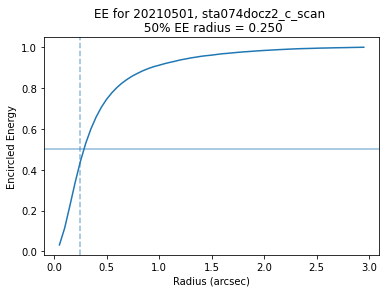

In [7]:
test_img_base = 'sta074docz2_c_scan'

from astropy.table import Table
ee = Table.read(root_dir + 'reduce/Fld2/ee/' + test_img_base + '_clean_ee.txt', format='ascii')

plt.plot(ee['Radius'], ee['EE'])
plt.xlabel('Radius (arcsec)')
plt.ylabel('Encircled Energy')

fdx = np.where(ee['EE'] < 0.5)[0][-1]
fwhm = ee['Radius'][fdx]

plt.axhline(0.5, alpha=0.5)
plt.axvline(fwhm, ls ='--',alpha=0.5)
plt.title(f"EE for {night}, {test_img_base} \n 50% EE radius = {fwhm:.3f}")


print(f'50% EE radius = {fwhm:.3f}"')

Play with a star list and look at trends in FWHM, etc. 

x: fwhm_x_avg = 0.44" fwhm_x_med = 0.45" fwhm_x_std = 0.06"
x: fwhm_x_avg = 0.44" fwhm_x_med = 0.45" fwhm_x_std = 0.06"


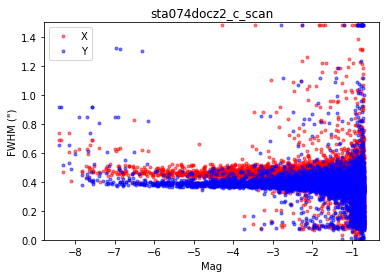

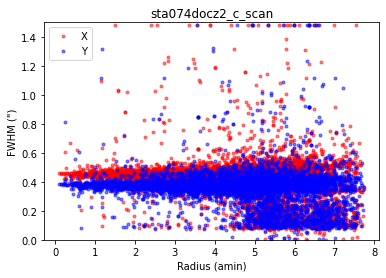

In [8]:
stars = Table.read(root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars.txt', format='ascii')

# Get the plate scale
img, hdr = fits.getdata(root_dir + 'Fld2/' + test_img_base + '.fits', header=True)
scale = util.get_plate_scale(img, hdr)
del img
del hdr

plt.figure()
plt.plot(stars['mag'], stars['x_fwhm'] * scale, 'r.', label='X', alpha=0.5)
plt.plot(stars['mag'], stars['y_fwhm'] * scale, 'b.', label='Y', alpha=0.5)
plt.xlabel('Mag')
plt.ylabel('FWHM (")')
plt.legend()
plt.ylim(0, 1.5)
plt.title(test_img_base)

plt.figure()
r = np.hypot(stars['xcentroid'] - (stars['xcentroid'].max() / 2.0), 
             stars['ycentroid'] - (stars['ycentroid'].max() / 2.0)) * scale / 60.0
plt.plot(r, stars['x_fwhm'] * scale, 'r.', label='X', alpha=0.5)
plt.plot(r, stars['y_fwhm'] * scale, 'b.', label='Y', alpha=0.5)
plt.xlabel('Radius (amin)')
plt.ylabel('FWHM (")')
plt.legend()
plt.ylim(0, 1.5)
plt.title(test_img_base)

fwhm_x_avg, fwhm_x_med, fwhm_x_std = sigma_clipped_stats(stars['x_fwhm'] * scale)
fwhm_y_avg, fwhm_y_med, fwhm_y_std = sigma_clipped_stats(stars['y_fwhm'] * scale)
print(f'x: fwhm_x_avg = {fwhm_x_avg:.2f}" fwhm_x_med = {fwhm_x_med:.2f}" fwhm_x_std = {fwhm_x_std:.2f}"')
print(f'x: fwhm_x_avg = {fwhm_x_avg:.2f}" fwhm_x_med = {fwhm_x_med:.2f}" fwhm_x_std = {fwhm_x_std:.2f}"')

Text(0, 0.5, 'Emp. FWHM (")')

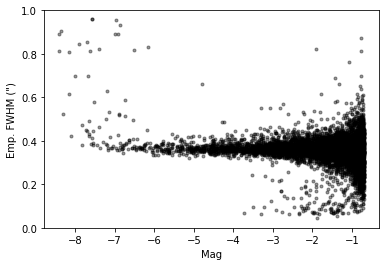

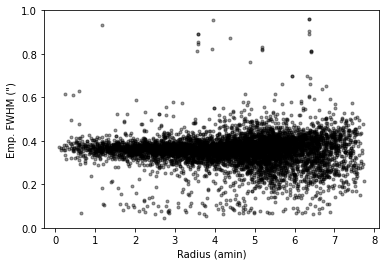

In [9]:
stars2 = Table.read(root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats.fits')
plt.figure()
plt.plot(stars2['mag'], stars2['fwhm_emp'] * scale, 'k.', alpha=0.4)
plt.ylim(0, 1)
plt.xlabel('Mag')
plt.ylabel('Emp. FWHM (")')

plt.figure()
r = np.hypot(stars2['xcentroid'] - (stars2['xcentroid'].max() / 2.0), 
             stars2['ycentroid'] - (stars2['ycentroid'].max() / 2.0)) * scale / 60.0
plt.plot(r, stars2['fwhm_emp'] * scale, 'k.', alpha=0.4)
plt.ylim(0, 1)
plt.xlabel('Radius (amin)')
plt.ylabel('Emp. FWHM (")')

## Night Long Stats

In [11]:
stats = Table.read(root_dir + 'reduce/stats/stats_docz.fits')

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std']


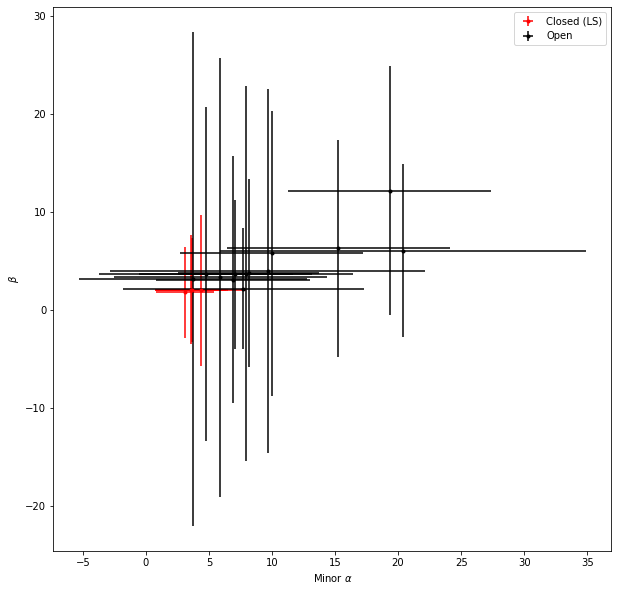

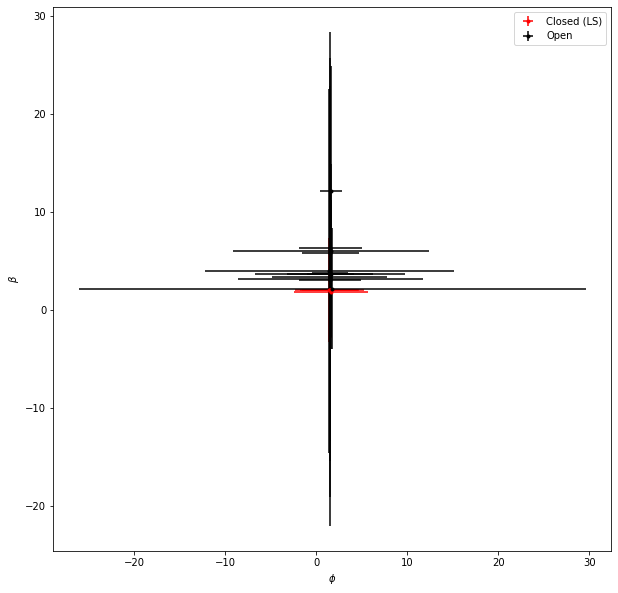

In [12]:
# stats by star 
stats_c = Table.read(root_dir + 'reduce/stats/stats_LS_mdp.fits')
stats_o = Table.read(root_dir + 'reduce/stats/stats_open_mdp.fits')

# stats by stack? => doesn't work
#stats_c = Table.read(root_dir + 'reduce/stacks/fld2_stack_LS_c_stars_stats_mdp.fits')
#stats_o = Table.read(root_dir + 'reduce/stacks/fld2_stack__o_stars_stats.fits')

print(stats.colnames)

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Minor Alpha'], stats_c['Beta'], xerr=stats_c['Minor Alpha std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Minor Alpha'], stats_o['Beta'], xerr=stats_o['Minor Alpha std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'Minor $\alpha$')
plt.ylabel(r'$\beta$')
plt.legend()

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Phi'], stats_c['Beta'], xerr=stats_c['Phi std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Phi'], stats_o['Beta'], xerr=stats_o['Phi std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\beta$')
plt.legend()

## Night Summary Plots

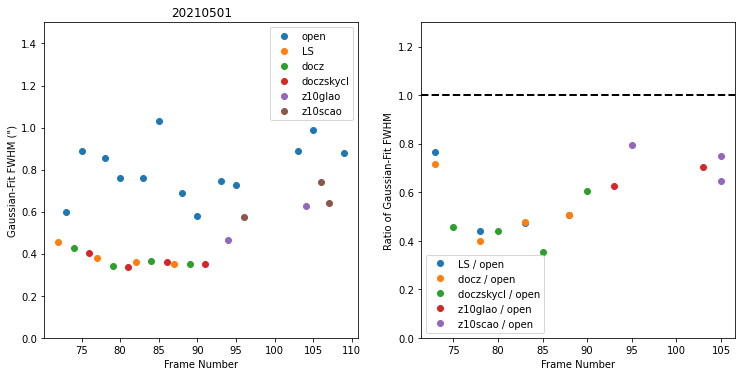

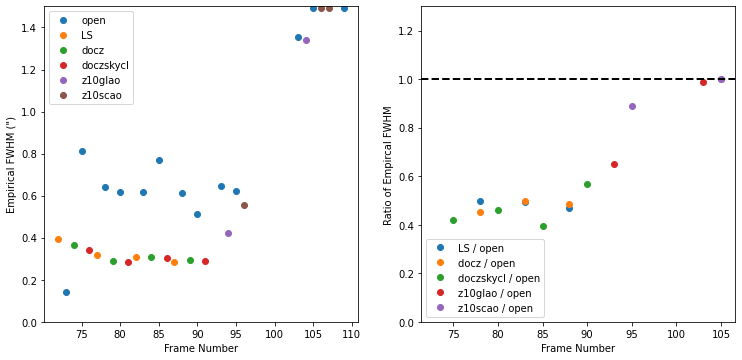

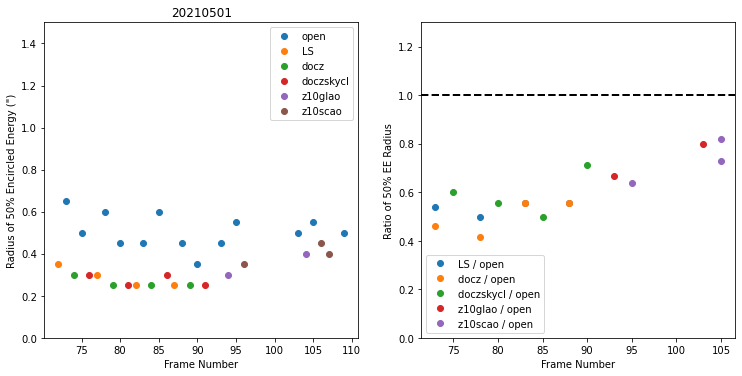

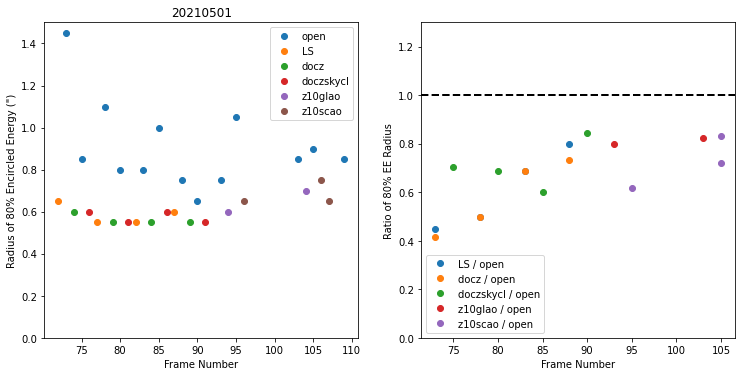

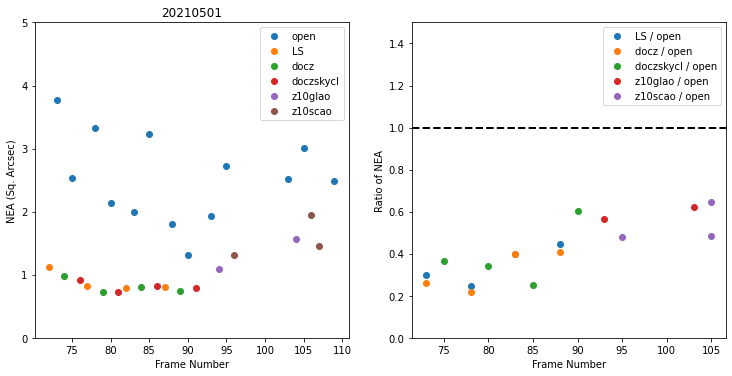

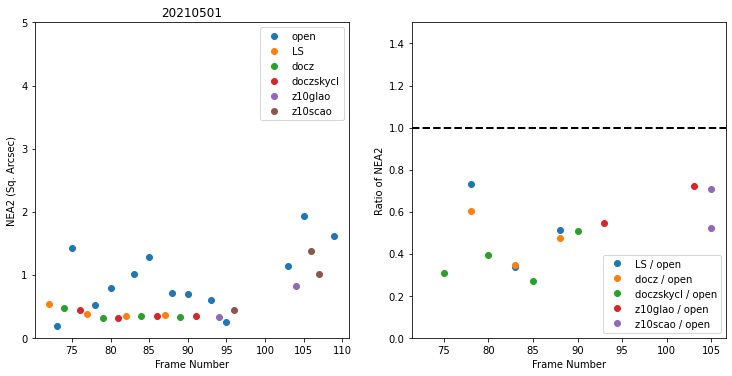

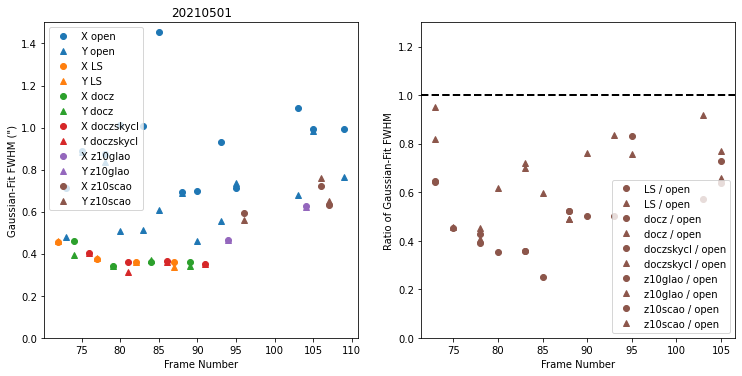

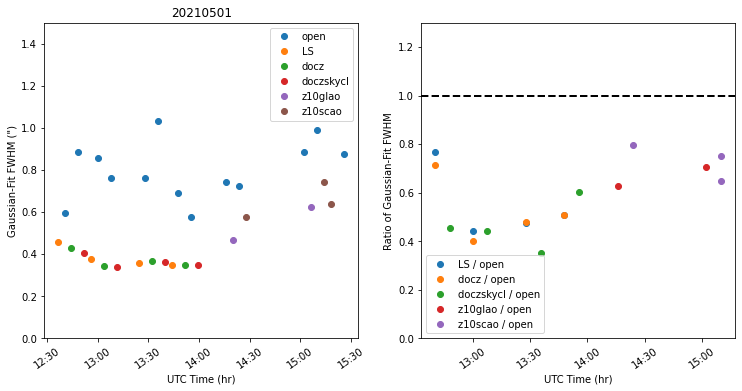

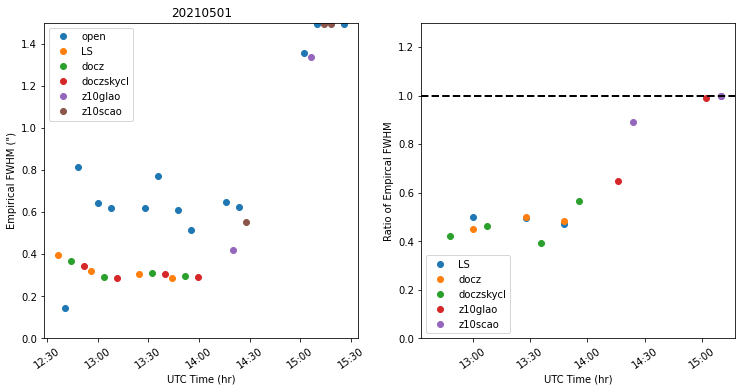

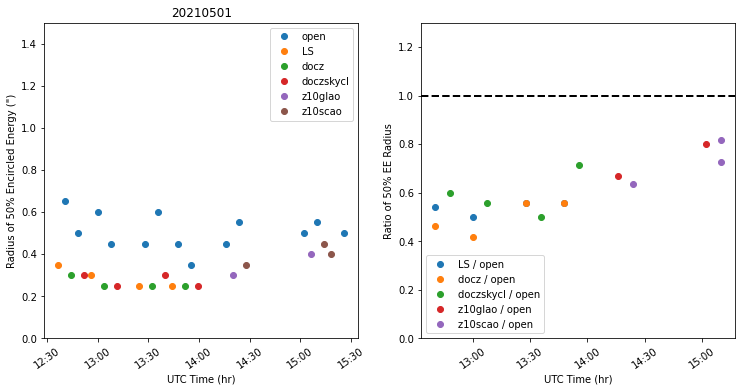

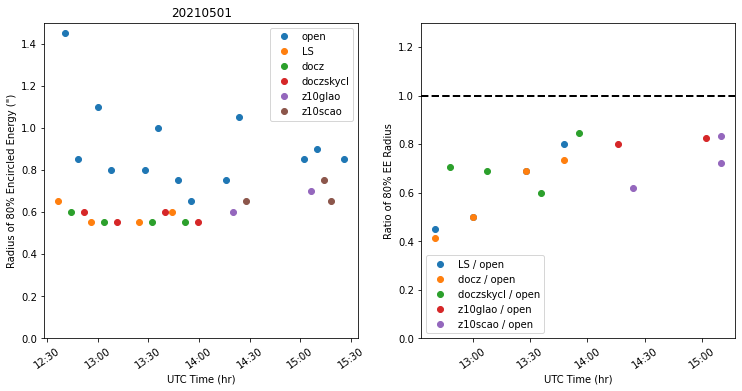

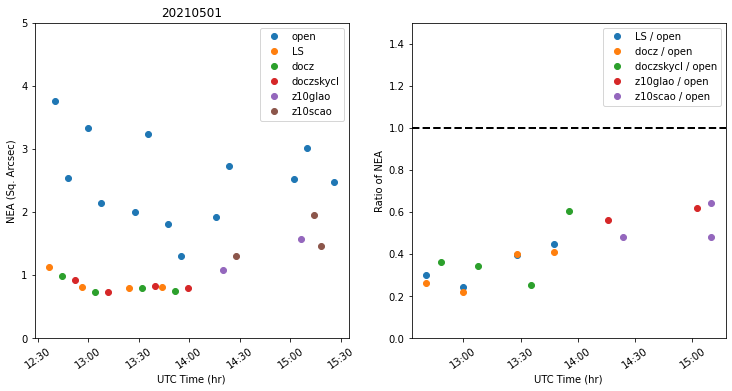

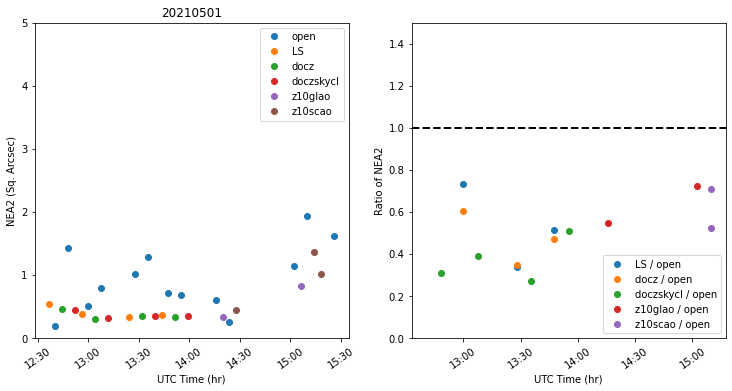

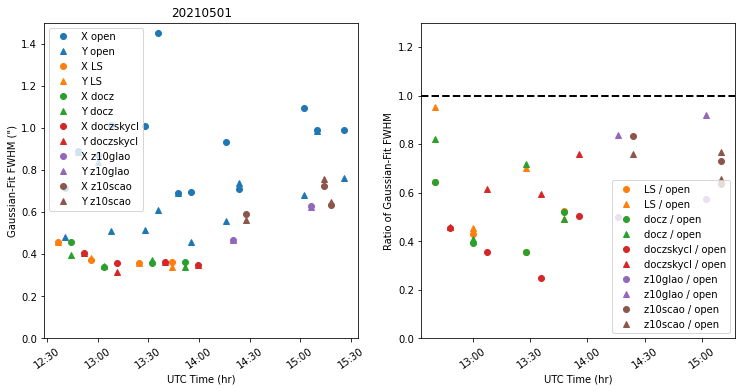

In [13]:
suffixes = list(redu.dict_suffix.keys())
#suffixes = ['docz', 'open']
plot_stats.plot_stack_stats(night, suffixes=suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

# Time Variation w/MASS-DIMM

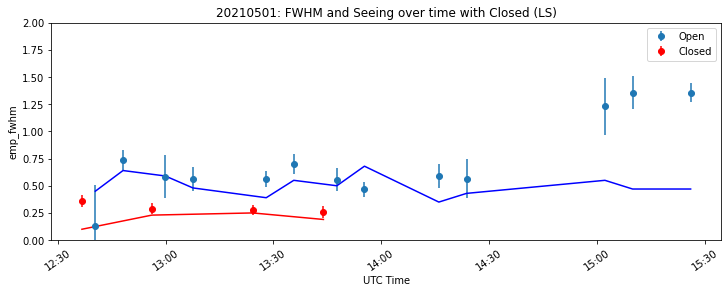

In [14]:
open_file = stats_dir + "stats_open_mdp.fits"
closed_file2 = stats_dir + "stats_LS_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed (LS)", plots_dir)

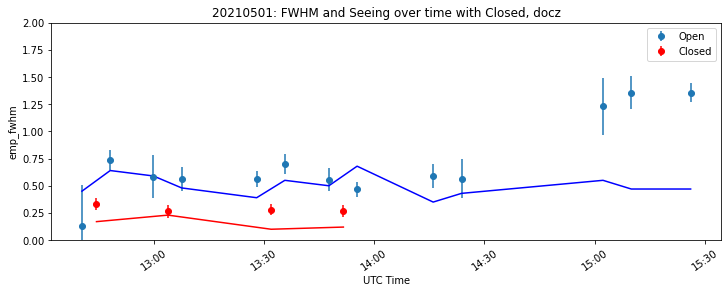

In [15]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_docz_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, docz", plots_dir)

# Aggregate Plots

['open', 'LS', 'docz', 'doczskycl', 'z10glao', 'z10scao']


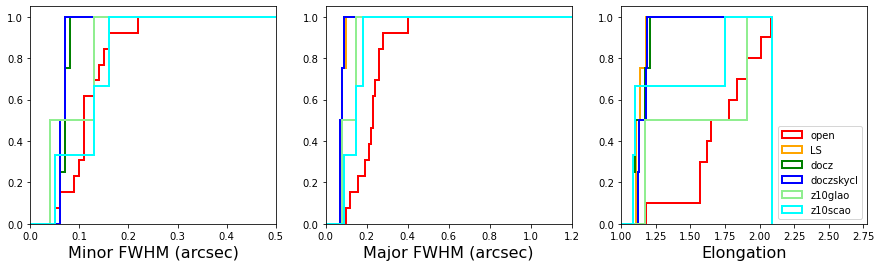

In [17]:
files = [stats_dir + 'stats_' + suffix + '_mdp.fits' for suffix in suffixes]
print(suffixes)
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, suffixes, colors)

# Field Variability

# Field Variability

In [18]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Single file. closed loop

sta074docz2_c_scan
Median FWHM           = 0.323"
Median FWHM (clipped) = 0.324"
Mean FWHM             = 0.352"
Mean FWHM (clipped)   = 0.324"
Stddev FWHM           = 0.499"
Stddev FWHM (clipped) = 0.025"


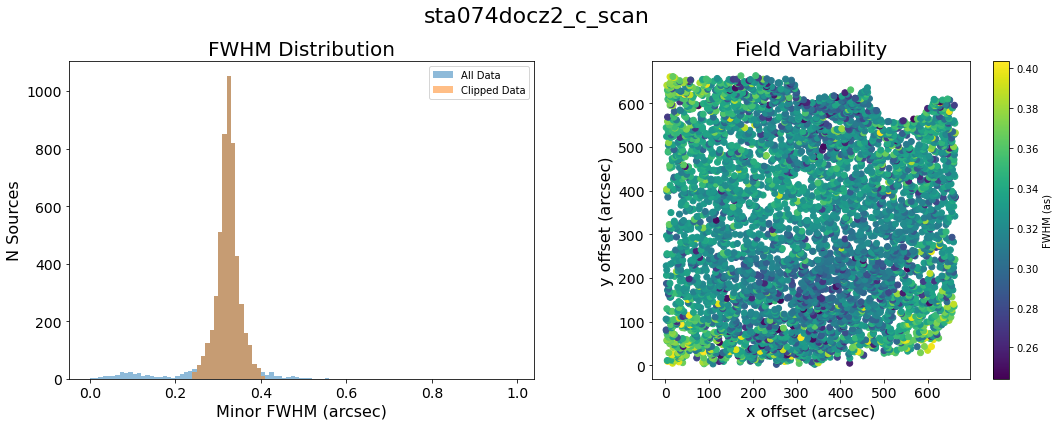

In [19]:
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

### Open Loop

In [2]:
img_file = stack_dir + 'fld2_stack__o.fits' 
starlist = stack_dir + 'fld2_stack__o_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, "Open Loop")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210430/sta/reduce/stacks/fld2_stack__o_stars_stats_mdp.fits'

### Closed (LS)

In [3]:
img_file = stack_dir + 'fld2_stack_LS_c.fits' 
starlist = stack_dir + 'fld2_stack_LS_c_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, "Closed (LS)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210430/sta/reduce/stacks/fld2_stack_LS_c_stars_stats_mdp.fits'

### Closed (docz2)

Median FWHM           = 0.331"
Median FWHM (clipped) = 0.306"
Mean FWHM             = 6268724.604"
Mean FWHM (clipped)   = 0.448"
Stddev FWHM           = 789165697.138"
Stddev FWHM (clipped) = 0.506"


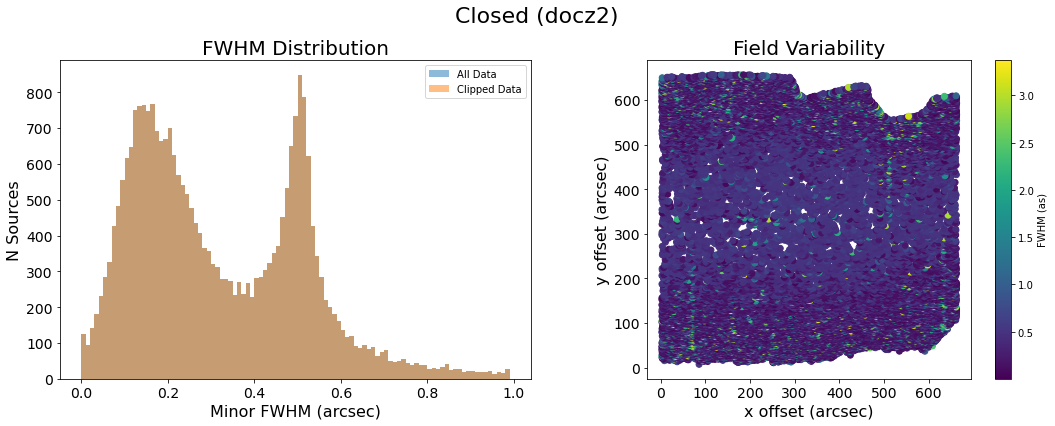

In [28]:
img_file = stack_dir + 'fld2_stack_docz2_c.fits' 
starlist = stack_dir + 'fld2_stack_docz2_c_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, "Closed (docz2)")